## SC1015 Project

Can we identify defining characteristics of a particular song genre that makes them unique? Can we accurately predict the genre of a particular song based on these characteristics? In this project, we utilize the Spotify Music Dataset on Kaggle to find out if the popularity of a song can be determined by acoustic data such as acousticness, danceability, liveliness and energy.

We aim to:
1. Accurately predict the genre of songs based upon their characteristics. (Training on songs in the Spotify Music Dataset)
2. Demonstrate how relevant our predictions are in real life by predicting the genre of songs in an extra test dataset and checking whether their genres are reflected by the predictions of our model.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

Import the dataset we will be using:

In [5]:
songdata = pd.read_csv('data/genre_music_cleaned.csv')

### Since no clear correlation is found on univariate linear regression, we use Feedforward Neural Network (Multi-layer Perceptron)


This is the initial model, which is trained on most of the numeric variables in the dataset.

MLPClassifier predicts classes that inputs fall into, and therefore we need to classify the genre values and label encode them.

The labels given to each genre are as follows:

0. EDM
1. Latin
2. Pop
3. R&B
4. Rap
5. Rock

In [6]:
from sklearn.preprocessing import LabelEncoder

# label encoding genre
songdata['genre'] = LabelEncoder().fit_transform(songdata['genre'])
songdata.head()

,Unnamed: 0,track,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,duration_s,time_signature,chorus_hit,sections,popularity,decade,genre
0,0,Jealous Kind Of Fella,Garland Green,0.417,0.620,3,-7.727,1,0.0403,0.490,...,0.0779,0.845,185.655,173.533,3,32.94975,9,1,60s,0
1,1,Initials B.B.,Serge Gainsbourg,0.498,0.505,3,-12.475,1,0.0337,0.018,...,0.1760,0.797,101.801,213.613,4,48.82510,10,0,60s,2
2,2,Melody Twist,Lord Melody,0.657,0.649,5,-13.392,1,0.0380,0.846,...,0.1190,0.908,115.940,223.960,4,37.22663,12,0,60s,2
3,3,Mi Bomba Sonó,Celia Cruz,0.590,0.545,7,-12.058,0,0.1040,0.706,...,0.0610,0.967,105.592,157.907,4,24.75484,8,0,60s,2
4,4,Uravu Solla,P. Susheela,0.515,0.765,11,-3.515,0,0.1240,0.857,...,0.2130,0.906,114.617,245.600,4,21.79874,14,0,60s,3


We now need to scale the predictor variables so that they can be used together to predict the genre.

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

songdata[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'tempo', 'time_signature', 'valence', 'mode', 'speechiness', 'chorus_hit', 'sections']] = MinMaxScaler().fit_transform(songdata[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'tempo', 'time_signature', 'valence', 'mode', 'speechiness', 'chorus_hit', 'sections']])

songdata.drop(columns=['popularity', 'track', 'artist', 'decade', 'time_signature', 'sections'], inplace=True)
songdata.describe()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_s,chorus_hit,genre
count,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000,35853.000000
mean,19952.822916,0.542633,0.575719,5.202605,0.734070,0.692941,0.076686,0.374916,0.161579,0.192288,0.544558,0.494928,234.697358,0.092719,2.757315
std,11880.308641,0.181162,0.254555,3.533002,0.101216,0.461281,0.091585,0.342635,0.309249,0.176256,0.270307,0.120988,123.102013,0.044200,1.301303
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.168000,0.000000,0.000000
25%,9587.000000,0.420040,0.389847,2.000000,0.684963,0.000000,0.035208,0.041466,0.000000,0.082353,0.329317,0.403620,170.667000,0.063628,2.000000
50%,19695.000000,0.554656,0.595899,5.000000,0.752495,1.000000,0.045417,0.277108,0.000145,0.120690,0.561245,0.487123,216.712000,0.082806,2.000000
75%,30192.000000,0.675101,0.784946,8.000000,0.806989,1.000000,0.073229,0.693775,0.080800,0.253550,0.773092,0.566713,266.840000,0.110258,3.000000
max,41095.000000,1.000000,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4170.227000,1.000000,5.000000


In [8]:
songdata['genre'].value_counts()

2    14329
3     9455
5     6190
1     2469
4     2104
0     1306
Name: genre, dtype: int64

We note that the numbers of each songs per category are different. For example, there are 14247 songs in the Pop genre, whereas there are only 1326 songs in the EDM genre. Although using a Train/Test model would help to obtain random sampling of data, as there is a huge difference in sample size between song categories, we run the risk of introducing a significant sampling bias. 

Hence, we use Stratified Sampling Technique, which would help to eliminate the biasness of the selection of data.

Source: https://medium.com/@IrekponorVictor/creating-an-unbiased-test-set-for-your-model-using-stratified-sampling-technique-672b778022d5

In [9]:
# importing StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)

for train_index, test_index in split.split(songdata, songdata['genre']):
     train_set, test_set = songdata.iloc[train_index], songdata.iloc[test_index]

# after obtaining train/test set, proceed to split train into X and y train set, and test into x and y test set
y_train = pd.DataFrame(train_set['genre'])
x_train = train_set
x_train = x_train.drop(columns=['genre'])

y_test = pd.DataFrame(test_set['genre'])
x_test = test_set
x_test = x_test.drop(columns=['genre'])

Check how many songs in each genre there are in train/test set

In [10]:
y_train.value_counts()

genre
2        11463
3         7564
5         4952
1         1975
4         1683
0         1045
dtype: int64

In [11]:
y_test.value_counts()

genre
2        2866
3        1891
5        1238
1         494
4         421
0         261
dtype: int64

After obtaining Train/Test data, use MLPClassifier.

The initial model is designed with 3 hidden layers of sizes 15, 8 and 5 respectively, max iterations of 1000, the relu activation function, stochastic gradient descent solver and a batch size of 258.

In [12]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(15, 8, 5), max_iter=1000,activation = 'relu',solver='sgd',batch_size=258,random_state=1)

classifier.fit(x_train, y_train.values.ravel())
y_pred = classifier.predict(x_train)

#Importing Confusion Matrix
from sklearn.metrics import confusion_matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(y_pred, y_train)

#Printing the accuracy
print("Accuracy of MLPClassifier : ", accuracy(cm))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of MLPClassifier :  0.39965832229272713


Try plotting the correlation matrix.

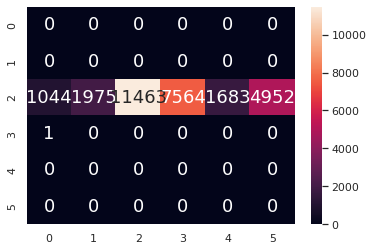

In [15]:
sb.heatmap(cm, annot=True, fmt=".0f", annot_kws={"size":18})

Check the accuracy on the test data.

In [16]:
y_test_pred = classifier.predict(x_test)

cm = confusion_matrix(y_test_pred, y_test)

# print accuracy
print('Accuracy of MLPClassifier on test data :', accuracy(cm))

Accuracy of MLPClassifier on test data : 0.39938641751499093


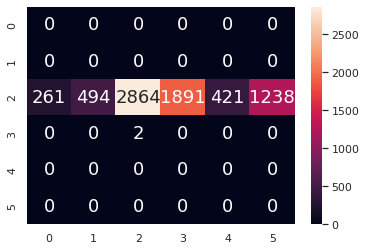

In [17]:
sb.heatmap(cm, annot=True, fmt=".0f", annot_kws={"size":18})

Clearly, the results of this model are very inaccurate, and it has been trained on too large a batch size, which has resulted in the model being unable to differentiate between each genre, and simply predicts all genres as being from the same genre.

Save the model into a file with pickle to load later.

In [18]:
import pickle

# save the model to disk
filename = 'model/initial_model.sav'
pickle.dump(classifier, open(filename, 'wb'))